In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skewnorm
from scipy.stats import norm
from scipy import special

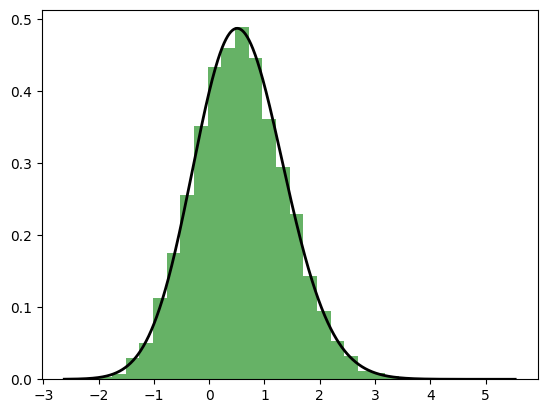

In [2]:
# Define the number of samples, the location, the scale, and the skewness
num_samples = 10000
mu_data = 0.0  # location (mean) 
sd_data = 1.0  # scale (standard deviation) 
alpha_data = 1.0  # skewness (negative value means left skew, positive means right skew)

# Generate the skew-normal dataset
dist = skewnorm(alpha_data, mu_data, sd_data)
samples = dist.rvs(num_samples)

# Create a histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = skewnorm.pdf(x, alpha_data, mu_data, sd_data)
plt.plot(x, p, 'k', linewidth=2)

x_values = x  # x values are the points at which you're evaluating the PDF
y_values = p  # y values are the corresponding values of the PDF

In [3]:
# derivative of the probablity density function of skew-normal distribution with respect to each parameter
def dS_dmu(x, mu, sd, alpha):
    dPDF_dmu = 1 / ((sd ** 3) * np.sqrt(2 * np.pi)) * (x - mu) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
    PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
    ERF = special.erf(alpha * (x - mu) / (np.sqrt(2) * sd))
    dERF_dmu = - alpha * np.sqrt(2) / (np.sqrt(np.pi) * sd) * np.exp(- np.square((alpha * (x - mu) / (np.sqrt(2) * sd))))
    
    return dPDF_dmu * ERF + PDF * dERF_dmu + dPDF_dmu

def dS_dalpha(x, mu, sd, alpha):
    PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
    dERF_dalpha = np.sqrt(2) * (x - mu) / (np.sqrt(np.pi) * sd) * np.exp(- np.square((alpha * (x - mu) / (np.sqrt(2) * sd))))
    
    return PDF * dERF_dalpha

def dS_dsd(x, mu, sd, alpha):
    dPDF_dsd = - ((np.square(sd) - np.square(x) + 2 * mu * x - np.square(mu)) / (sd**4 * np.sqrt(2 * np.pi))) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
    dERF_dsd = - (np.sqrt(2) * alpha * (x - mu) / (np.sqrt(np.pi) * np.square(sd))) * np.exp(- np.square((alpha * (x - mu) / (np.sqrt(2) * sd))))
    PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
    ERF = special.erf(alpha * (x - mu) / (np.sqrt(2) * sd))
    
    return dPDF_dsd + dPDF_dsd * ERF + PDF * dERF_dsd

In [4]:
# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# Layer Alpha (Skewness)
class Alpha:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
# Layer Mu (Mean)
class MU:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
# Layer SD (Standard Deviation)
class SD:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
        # self.output = np.maximum(0, self.output)

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
# Output layer
class OutputNeuron:
    
    # Layer initialization
    def __init__(self, X):
        # Initialize weights and biases
        self.weights = 1
        self.biases = 0
        self.x = X
    
    # Forward pass
    def forward(self, mu, sd, alpha):
        self.mu = mu
        self.sd = sd
        self.alpha = alpha
        self.output = skewnorm.pdf(self.x, self.alpha, self.mu, self.sd)
        
    def backward_alpha(self, dvalues, mu, sd, alpha):
        self.dinputsAlpha = dvalues * dS_dalpha(self.x, mu, sd, alpha)
    
    def backward_mu(self, dvalues, mu, sd, alpha):
        self.dinputsMu = dvalues * dS_dmu(self.x, mu, sd, alpha)
        
    def backward_sd(self, dvalues, mu, sd, alpha):
        self.dinputsSD = dvalues * dS_dsd(self.x, mu, sd, alpha)

In [5]:
# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0
        
# Linear activation
class Activation_Linear:

    # Forward pass
    def forward(self, inputs):
        # Just remember values
        # mean_inputs = np.mean(inputs)
        # self.inputs = np.full(inputs.shape, mean_inputs)
        # self.output = inputs
        self.inputs = inputs   
        self.output = inputs

    # Backward pass
    def backward(self, dvalues):
        # derivative is 1, 1 * dvalues = dvalues - the chain rule
        # mean_dvalues = np.mean(dvalues)
        # self.dinputs = np.full(dvalues.shape, mean_dvalues)
        self.dinputs = dvalues.copy()

In [6]:
# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=0.05, decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))
    
    # Update parameters
    def update_params(self, layer):

        weight_updates = -self.current_learning_rate * \
                            layer.dweights
        bias_updates = -self.current_learning_rate * \
                        layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1
        
# Adam optimizer
class Optimizer_Adam:

    # Initialize optimizer - set settings
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7,
                 beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If layer does not contain cache arrays,
        # create them filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # Update momentum  with current gradients
        layer.weight_momentums = self.beta_1 * \
                                 layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * \
                               layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases
        # Get corrected momentum
        # self.iteration is 0 at first pass
        # and we need to start with 1 here
        weight_momentums_corrected = layer.weight_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
            (1 - self.beta_1 ** (self.iterations + 1))
        # Update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + \
            (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
            (1 - self.beta_2) * layer.dbiases**2
        # Get corrected cache
        weight_cache_corrected = layer.weight_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
            (1 - self.beta_2 ** (self.iterations + 1))

        # Vanilla SGD parameter update + normalization
        # with square rooted cache
        layer.weights += -self.current_learning_rate * \
                         weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) +
                             self.epsilon)
        layer.biases += -self.current_learning_rate * \
                         bias_momentums_corrected / \
                         (np.sqrt(bias_cache_corrected) +
                             self.epsilon)

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


In [7]:
class Loss:
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss
        
    
        # Regularization loss calculation
    def regularization_loss(self, layer):

        # 0 by default
        regularization_loss = 0

        # L1 regularization - weights
        # calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                   np.sum(np.abs(layer.weights))

        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                   np.sum(layer.weights * \
                                          layer.weights)


        # L1 regularization - biases
        # calculate only when factor greater than 0
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                   np.sum(np.abs(layer.biases))

        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                   np.sum(layer.biases * \
                                          layer.biases)

        return regularization_loss
    
# Mean Squared Error loss
class Loss_MeanSquaredError(Loss):  # L2 loss

    # def __init__(self, inputs):
    #     self.inputs = inputs
    # Forward pass
    def forward(self, y_pred, y_true):
        
        # y_pred = skewnorm.pdf(self.inputs, alpha, 0 ,1)
        # y_pred = 2 * norm.pdf(self.inputs, 0, 1) * norm.cdf(alpha * self.inputs, 0, 1)
        # print(len(y_pred))
        # plt.clf()
        # plt.plot(self.inputs, y_pred)
        # print("y_pred", np.mean(y_pred))
        
        # Calculate loss
        # sample_losses = - np.mean((y_true - y_pred)**2, axis=-1)
        sample_losses = np.mean((y_true - y_pred)**2)

        # Return losses
        return sample_losses

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of outputs in every sample
        # We'll use the first sample to count them
        outputs = len(dvalues[0])

        # Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # self.dinputs = -2/outputs * (y_true - norm.pdf(self.inputs, 0, 1) *  norm.cdf(alpha * self.inputs, 0, 1)) * \
        #     norm.pdf(self.inputs, 0, 1) * 2/np.sqrt(2) * np.exp(-((alpha * self.inputs)/np.sqrt(2)) ** 2)
        # print("dinputs", np.mean(self.dinputs))
        # Normalize gradient
        self.dinputs = self.dinputs / samples
        # print("dinputs", self.dinputs)
        
        

In [8]:
# Create dataset
# X, y = sine_data()
X = x_values
X = X.reshape(-1, 1)
y = y_values
y = y.reshape(-1, 1)

# Create Dense layer with 1 input feature and 64 output values
dense1 = Layer_Dense(1, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 64 output values
dense2 = Layer_Dense(64, 64)

# Create ReLU activation (to be used with Dense layer):
activation2 = Activation_ReLU()

# Create third Dense layer with 64 input features (as we take output
# of previous layer here) and 1 output value
dense3 = Layer_Dense(64, 64)

# Create Linear activation:
activation3 = Activation_ReLU()

dense4 = Layer_Dense(64, 64)

activation4 = Activation_ReLU()

dense5 = Layer_Dense(64, 64)

# Create Linear activation:
activation5 = Activation_ReLU()

alpha = Alpha(64, 1)
mu = MU(64, 1)
sd = SD(64, 1)

activation_sd = Activation_ReLU()

outputNeuron = OutputNeuron(X)

# Create loss function
loss_function = Loss_MeanSquaredError()

# Create optimizer
optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-3)
# optimizer = Optimizer_SGD()

In [9]:
accuracy_precision = np.std(y) / 2500
accuracy_precision

6.575740041046507e-05

In [10]:
# Train in loop
for epoch in range(1501):

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function
    # of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through activation function
    # takes the output of second dense layer here
    activation2.forward(dense2.output)

    # # Perform a forward pass through third Dense layer
    # # takes outputs of activation function of second layer as inputs
    # dense3.forward(activation2.output)

    # # Perform a forward pass through activation function
    # # takes the output of third dense layer here
    # activation3.forward(dense3.output)
    
    # dense4.forward(activation3.output)
    
    # activation4.forward(dense4.output)
    
    # dense5.forward(activation4.output)
    
    # activation5.forward(dense5.output)
    
    alpha.forward(activation2.output)
    mu.forward(activation2.output)
    sd.forward(activation2.output)
    activation_sd.forward(sd.output)
    
    # mu.output = 3
    # activation_sd.output = 1.0
    # alpha.output = 5.0
    
    outputNeuron.forward(np.mean(mu.output), np.mean(activation_sd.output), np.mean(alpha.output))

    # Calculate the data loss
    data_loss = \
            loss_function.calculate(outputNeuron.output, y)
            # loss_function.calculate(activation2.output, y) + \
            # loss_function.calculate(activation1.output, y)
            # loss_function.calculate(activation4.output, y) + \
            # loss_function.calculate(activation3.output, y)

    # Calculate overall loss
    loss = data_loss

    # Calculate accuracy from output of activation2 and targets
    # To calculate it we're taking absolute difference between
    # predictions and ground truth values and compare if differences
    # are lower than given precision value
    # predictions = activation3.output
    # predictions = skewnorm.pdf(X, outputNeuron.output, 0 ,1)
    predictions = outputNeuron.output
    # print("predictions", predictions)
    accuracy = np.mean(np.absolute(predictions - y) <
                       accuracy_precision)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} ' +
            #   f'data_loss: {data_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward pass
    # loss_function.backward(activation5.output, y)
    # activation5.backward(loss_function.dinputs)
    # dense5.backward(activation5.dinputs)
    # activation4.backward(dense5.dinputs)
    # dense4.backward(activation4.dinputs)
    # activation3.backward(dense4.dinputs)
    # dense3.backward(activation3.dinputs)
    # activation2.backward(dense3.dinputs)
    # dense2.backward(activation2.dinputs)
    # activation1.backward(dense2.dinputs)
    # dense1.backward(activation1.dinputs)

    loss_function.backward(outputNeuron.output, y)
    
    outputNeuron.backward_alpha(loss_function.dinputs, np.mean(mu.output), np.mean(activation_sd.output), np.mean(alpha.output))
    outputNeuron.backward_mu(loss_function.dinputs, np.mean(mu.output), np.mean(activation_sd.output), np.mean(alpha.output))
    outputNeuron.backward_sd(loss_function.dinputs, np.mean(mu.output), np.mean(activation_sd.output), np.mean(alpha.output))
    
    alpha.backward(outputNeuron.dinputsAlpha)
    mu.backward(outputNeuron.dinputsMu)
    activation_sd.backward(outputNeuron.dinputsSD)
    sd.backward(activation_sd.dinputs)
    
    # activation5.backward(alpha.dinputs)
    # dense5.backward(activation5.dinputs)
    # activation4.backward(alpha.dinputs)
    # dense4.backward(activation4.dinputs)
    # activation3.backward(alpha.dinputs)
    # dense3.backward(activation3.dinputs)
    
    activation2.backward(alpha.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    activation2.backward(mu.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    activation2.backward(sd.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    # optimizer.update_params(dense3)
    # optimizer.update_params(dense4)
    # optimizer.update_params(dense5)
    optimizer.update_params(alpha)
    optimizer.update_params(mu)
    optimizer.update_params(sd)
    optimizer.post_update_params()


d:\Workspace\Repos\ParameterEstimator\env\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1986: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\SPLSIP219\AppData\Local\Temp\ipykernel_6332\1518592546.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
C:\Users\SPLSIP219\AppData\Local\Temp\ipykernel_6332\1518592546.py:11: RuntimeWarning: divide by zero encountered in divide
  PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
C:\Users\SPLSIP219\AppData\Local\Temp\ipykernel_6332\1518592546.py:11: RuntimeWarning: invalid value encountered in multiply
  PDF = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(- np.square((x - mu)) / (2 * np.square(sd)))
C:\Users\SPLSIP219\AppData\Local\Temp\ipykernel_6332\1518592546.py:12: RuntimeWarning: divide by zero encountered in divide
  dERF_dalpha = np

epoch: 0, acc: 0.000, loss: nan lr: 0.005


epoch: 100, acc: 0.000, loss: nan lr: 0.004549590536851684
epoch: 200, acc: 0.000, loss: nan lr: 0.004170141784820684
epoch: 300, acc: 0.000, loss: nan lr: 0.003849114703618168
epoch: 400, acc: 0.000, loss: nan lr: 0.0035739814152966403
epoch: 500, acc: 0.000, loss: nan lr: 0.00333555703802535


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# X_test, y_test = sine_data()
X_test = x_values
X_test = X_test.reshape(-1, 1)
y_test = y_values
y_test = y_test.reshape(-1, 1)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
# dense3.forward(activation2.output)
# activation3.forward(dense3.output)
# dense4.forward(activation3.output)
# activation4.forward(dense4.output)
# dense5.forward(activation4.output)
# activation5.forward(dense5.output)
alpha.forward(activation2.output)
mu.forward(activation2.output)
sd.forward(activation2.output)
activation_sd.forward(activation_sd.output)

# mu.output = 3
# activation_sd.output = 1.0
# alpha.output = 5.0


# predictions = activation5.output
predictions = skewnorm.pdf(X, np.mean(alpha.output), np.mean(mu.output), np.mean(activation_sd.output))
# predictions = outputNeuron.output
# predictions = 2 * norm.pdf(X, 0, 1) * norm.cdf(np.mean(outputLayer.output) * X, 0, 1)

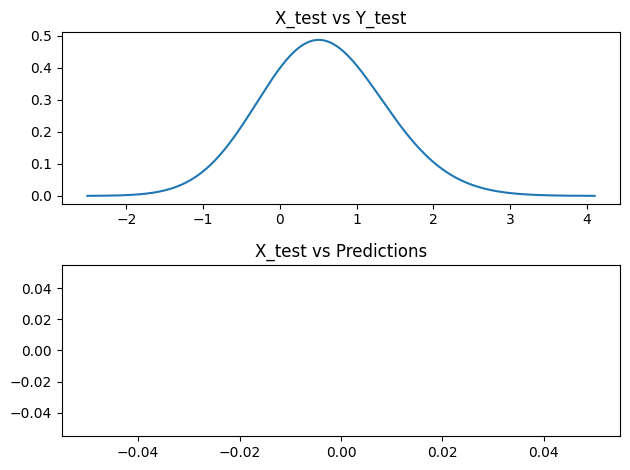

In [ ]:
# Create a new figure
plt.figure()

# Create the first subplot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first plot
plt.plot(X_test, y_values)
plt.title('X_test vs Y_test')

# Create the second subplot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second plot
plt.plot(X_test, predictions)
plt.title('X_test vs Predictions')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
print('alpha', np.mean(alpha.output))
print('mu', np.mean(mu.output))
print('sd', np.mean(activation_sd.output))
# print(alpha.output)

alpha nan
mu nan
sd 0.0


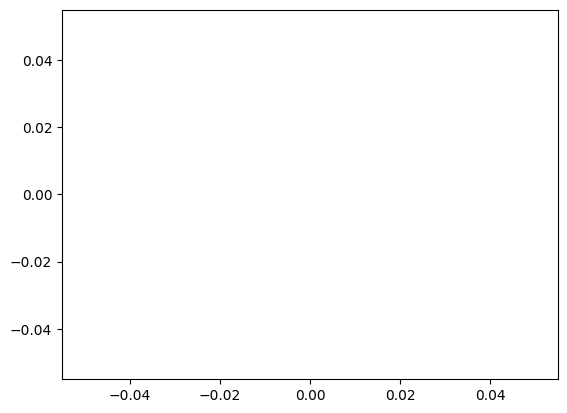

In [ ]:
fig, ax = plt.subplots(1, 1)

alpha_test = np.mean(alpha.output)
mu_test = np.mean(mu.output)
sd_test = np.mean(activation_sd.output)
# x = np.linspace(skewnorm.ppf(0.01, a),
#                 skewnorm.ppf(0.99, a), 100)

ax.plot(x, skewnorm.pdf(X_test, alpha_test, mu_test, sd_test),
       'r-', lw=2, label='skewnorm pdf')

